In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV
df_train = pd.read_csv('dataset/train.csv')

# Randomly select a row
random_index = np.random.randint(0, len(df_train))
random_row = df_train.iloc[random_index, :]

In [9]:
# Extract the label and pixel
label = random_row['label']
pixels = random_row.drop('label')

# Reshape pixel values to a 28x28 matrix
image = pixels.values.reshape(28, 28)

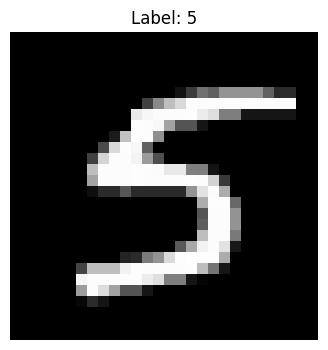

In [10]:
# Display the image with its label
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title('Label: %s' % label)
plt.axis('off')
plt.show()

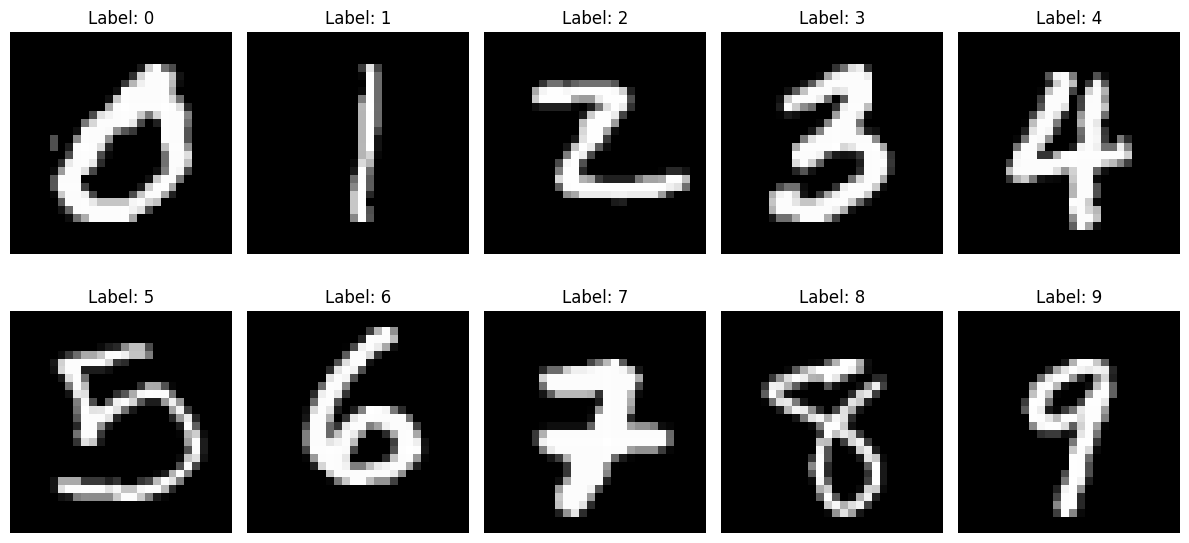

In [11]:
label_images = {}

# Select a random image for each label (0 to 9)
for label in range(10):
  # Filter the DataFrame for the current label
  label_df = df_train[df_train['label'] == label]

  # Randomly select an image for the current label
  random_index = np.random.randint(0, len(label_df))
  random_row = label_df.iloc[random_index, :]

  # Extract the pixel values and reshape into a 28x28 image
  pixels = random_row.drop('label')
  image = pixels.values.reshape(28, 28)

  # Store the image in the dictionary
  label_images[label] = image

# Plot all the images in a grid
plt.figure(figsize=(12, 6))
for label, image in label_images.items():
  plt.subplot(2, 5, label + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'Label: {label}')
  plt.axis('off')

plt.tight_layout()
plt.show()

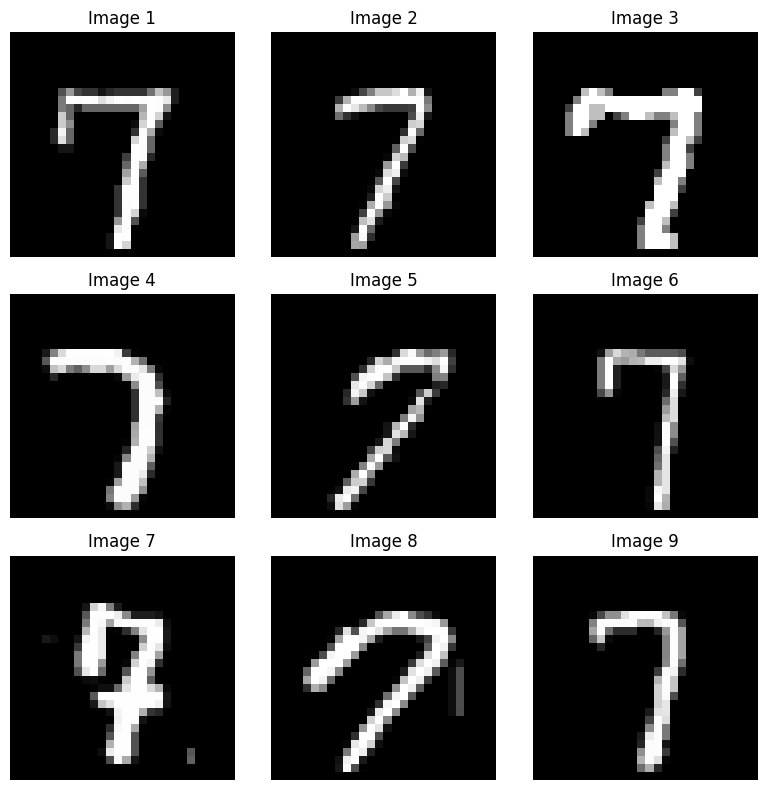

In [15]:
# Filter the DataFrame for label 7 and select the first nine images
label_7_df = df_train[df_train['label'] == 7].head(9)

# Create a list to store the images
images = []

# Extract and reshape the pixel values for each image
for index, row in label_7_df.iterrows():
  pixels = row.drop('label')
  image = pixels.values.reshape(28, 28)
  images.append(image)

# Plot the first nine images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.title(f'Image {i + 1}')
  plt.axis('off')

plt.tight_layout()
plt.show()

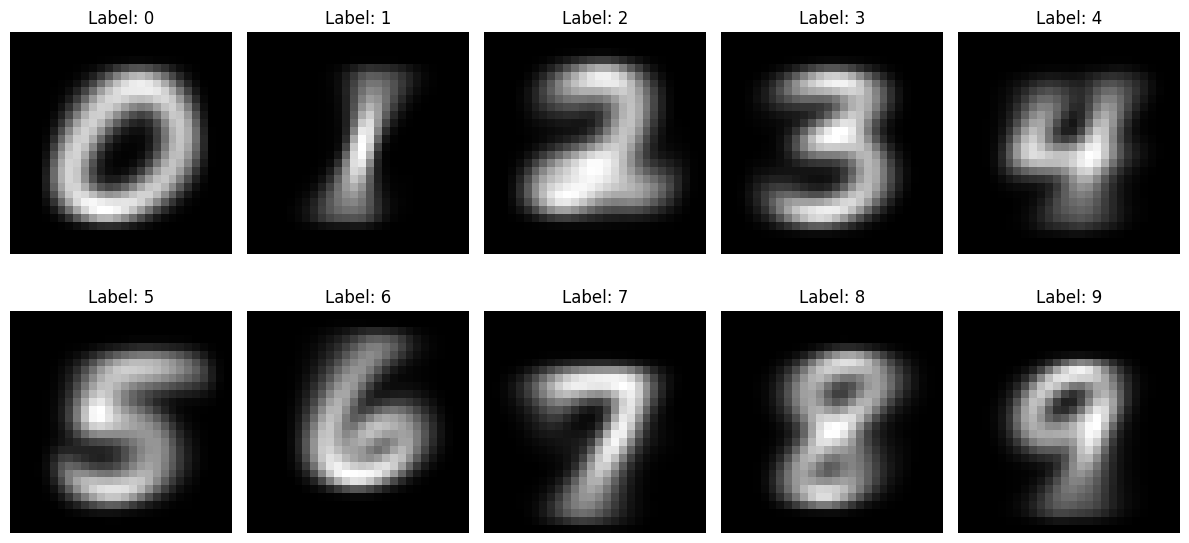

In [16]:
label_average_images = {}

# Calculate the average image for each label
for label in range(10):
  # Filter the DataFrame for the current label
  label_df = df_train[df_train['label'] == label]

  # Calculate the mean pixel values for the current label
  mean_pixels = label_df.drop('label', axis=1).mean().values

  # Reshape the mean pixel values into a 28x28 image
  mean_image = mean_pixels.reshape(28, 28)

  # Store the average image in the dictionary
  label_average_images[label] = mean_image

# Plot all the average images in a grid
plt.figure(figsize=(12, 6))
for label, image in label_average_images.items():
  plt.subplot(2, 5, label + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'Label: {label}')
  plt.axis('off')

plt.tight_layout()
plt.show()